In [1]:
import tensorflow as tf
tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns

(60000, 784)


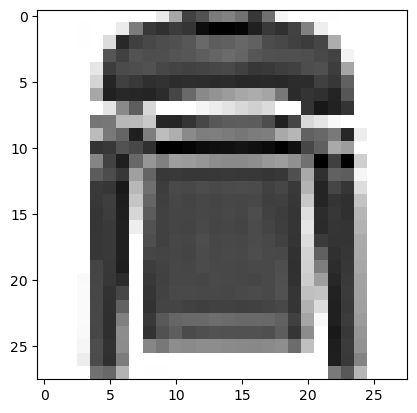

In [2]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

plt.imshow(X_train[5], cmap=plt.cm.gray_r, interpolation="nearest")

X_train = X_train.reshape(-1, 784) / 255.0
X_test = X_test.reshape(-1, 784) / 255.0

y_train = pd.get_dummies(y_train)
y_test = pd.get_dummies(y_test)

print(X_train.shape)

In [3]:
print("X train :", X_train.shape)
print("y train :", y_train.shape)
print("X test :", X_test.shape)
print("y test :", y_test.shape)

X train : (60000, 784)
y train : (60000, 10)
X test : (10000, 784)
y test : (10000, 10)


In [4]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from keras.callbacks import EarlyStopping

In [5]:
model = Sequential([
    Dense(64, input_shape=(784, ), activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(10, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 10)                170       
                                                                 
Total params: 53,018
Trainable params: 53,018
Non-trainable params: 0
_________________________________________________________________


In [6]:
model.compile(optimizer="adam", loss="categorical_crossentropy")
result = model.fit(X_train, y_train, validation_split=0.33, epochs=40, verbose=True)

Epoch 1/40
1257/1257 [==============================] - 2s 2ms/step - loss: 0.6507 - val_loss: 0.4569
Epoch 2/40
1257/1257 [==============================] - 2s 1ms/step - loss: 0.4226 - val_loss: 0.3934
Epoch 3/40
1257/1257 [==============================] - 2s 1ms/step - loss: 0.3761 - val_loss: 0.4018
Epoch 4/40
1257/1257 [==============================] - 2s 1ms/step - loss: 0.3500 - val_loss: 0.3646
Epoch 5/40
1257/1257 [==============================] - 2s 1ms/step - loss: 0.3316 - val_loss: 0.3725
Epoch 6/40
1257/1257 [==============================] - 2s 1ms/step - loss: 0.3180 - val_loss: 0.3718
Epoch 7/40
1257/1257 [==============================] - 2s 1ms/step - loss: 0.3036 - val_loss: 0.3454
Epoch 8/40
1257/1257 [==============================] - 2s 1ms/step - loss: 0.2945 - val_loss: 0.3718
Epoch 9/40
1257/1257 [==============================] - 2s 1ms/step - loss: 0.2835 - val_loss: 0.3408
Epoch 10/40
1257/1257 [==============================] - 2s 1ms/step - loss: 0.272

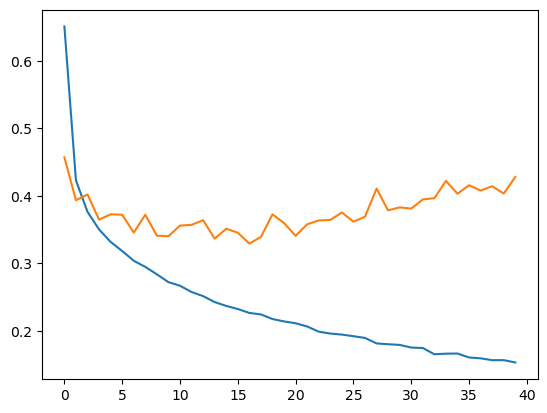

In [7]:
x = np.arange(0, 40)
y = result.history["loss"]
y2 = result.history["val_loss"]

plt.plot(x, y)
plt.plot(x, y2)

In [8]:
pred = model.predict(X_test)
print(pred.shape, y_test.shape)
cm_pred = confusion_matrix(y_test, pred)

sns.heatmap(cm_pred, cbar=False, annot=True, cmap="Greens", fmt="d")

313/313 [==============================] - 0s 546us/step
(10000, 10) (10000, 10)


ValueError: Classification metrics can't handle a mix of multilabel-indicator and continuous-multioutput targets